In [ ]:
import nltk
nltk.download('brown')
nltk.download('gutenberg')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [ ]:
from nltk.corpus import brown
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns

In [ ]:
#Load in the genres

genres = brown.categories()

#Exploratory Analysis

In [ ]:
news_text = brown.words(categories='news')

In [ ]:
news_text[:15]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced']

Distribution of corpus lengths of each of the genres

In [ ]:
genre_lengths = []

for cat in brown.categories(): 
  cat_words = brown.words(categories = cat)
  genre_lengths.append(len(cat_words))
  print(f"The {cat} category contains {len(cat_words)} words.")

The adventure category contains 69342 words.
The belles_lettres category contains 173096 words.
The editorial category contains 61604 words.
The fiction category contains 68488 words.
The government category contains 70117 words.
The hobbies category contains 82345 words.
The humor category contains 21695 words.
The learned category contains 181888 words.
The lore category contains 110299 words.
The mystery category contains 57169 words.
The news category contains 100554 words.
The religion category contains 39399 words.
The reviews category contains 40704 words.
The romance category contains 70022 words.
The science_fiction category contains 14470 words.


In [ ]:
genre_df = pd.DataFrame(data = genre_lengths, index=brown.categories(), columns = ['count']).sort_values(by='count', ascending=False)
genre_df

,count
learned,181888
belles_lettres,173096
lore,110299
news,100554
hobbies,82345
government,70117
romance,70022
adventure,69342
fiction,68488
editorial,61604


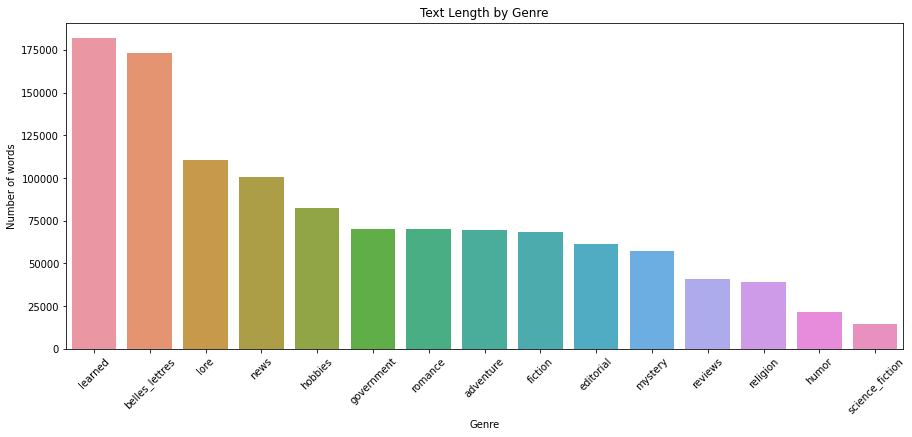

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = genre_df.index, y = genre_df['count'], )
plt.xticks(rotation = 45)

plt.title('Text Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of words')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


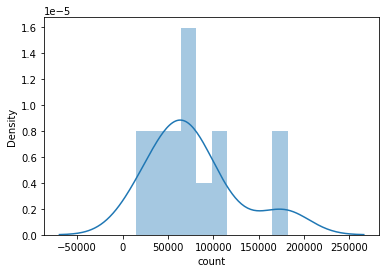

In [ ]:
sns.distplot(genre_df['count'], bins=10)

In [ ]:
from collections import Counter
        
#Function that performs preprocessing. Lowercases all words and filters out punctuation and numbers.

NUMS = '1234567890'
PUNC = string.punctuation + "''``--"
FILTER_WORDS = NUMS+PUNC

class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

def preprocess(corpus): 
  #Input: A list of tokens
  #Output: A list of preprocessed tokens.  
  
  #Initialize result list
  result = []

  for token in corpus: 
    if token not in FILTER_WORDS: 
      result.append(token.lower())
  return result


def get_freq_dist(corpus): 
  '''
  Input: Corpus of text
  Output: Frequency distribution of processed words in the corpus
  '''
  
  #Process the corpus
  pre = preprocess(corpus)

  #Make frequency distribution of the words from the preprocessed corpus
  freq_dist = Dist(pre)

  #Sort the frequency distribution in descending order
  freq_dist = {k:v for k,v in sorted(freq_dist.items(), key = lambda x:x[1], reverse=True)}
  
  return freq_dist




#Concatenate the lists of tokens from all the genres to form a holistic list that contains every single word from the Brown Corpus. 



In [ ]:
brown_words = []

for genre in brown.categories(): 
  genre_words = brown.words(categories=genre)
  brown_words += genre_words

In [ ]:
brown_dist = get_freq_dist(brown_words)


#Obtain Frequency Distributions for each genre

In [ ]:
genre_freqdict = {}
for genre in brown.categories(): 
  genre_text = brown.words(categories=genre)
  genre_freqdict[genre] = get_freq_dist(genre_text)

In [ ]:
genre_freqdict.keys()

dict_keys(['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'])

In [ ]:
scifi_dist = genre_freqdict['science_fiction']

In [ ]:
news_dist = genre_freqdict['news']

#Log-Log plot of rank v freq for the Brown Corpus

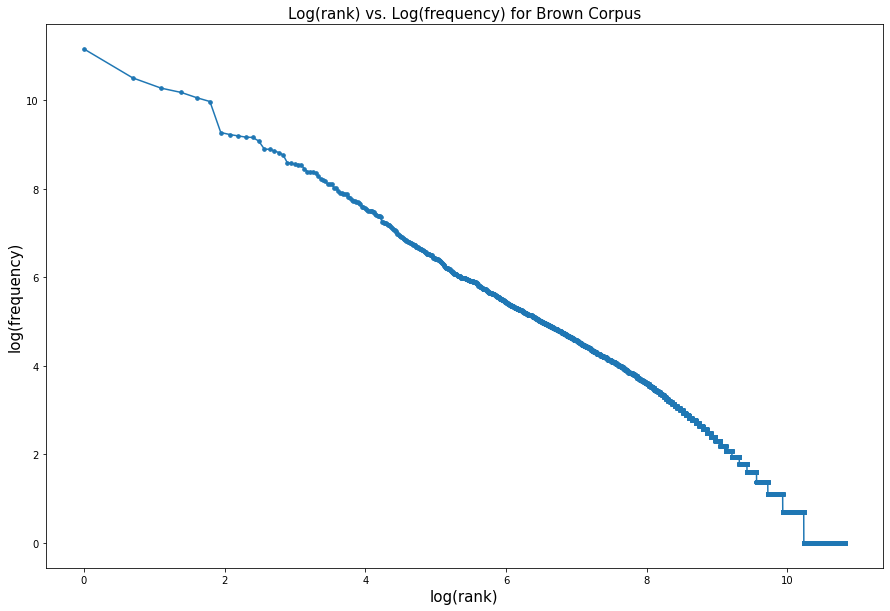

In [ ]:
fig = plt.subplots(figsize=(15,10))



plt.scatter(x=np.log(range(1,len(brown_dist)+1)), y=np.log(list(brown_dist.values())), s=13)
plt.plot(np.log(range(1,len(brown_dist)+1)), np.log(list(brown_dist.values())))


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency) for Brown Corpus', fontsize = 15)
plt.show()

#Log-Log plot of rank vs. frequency for every genre



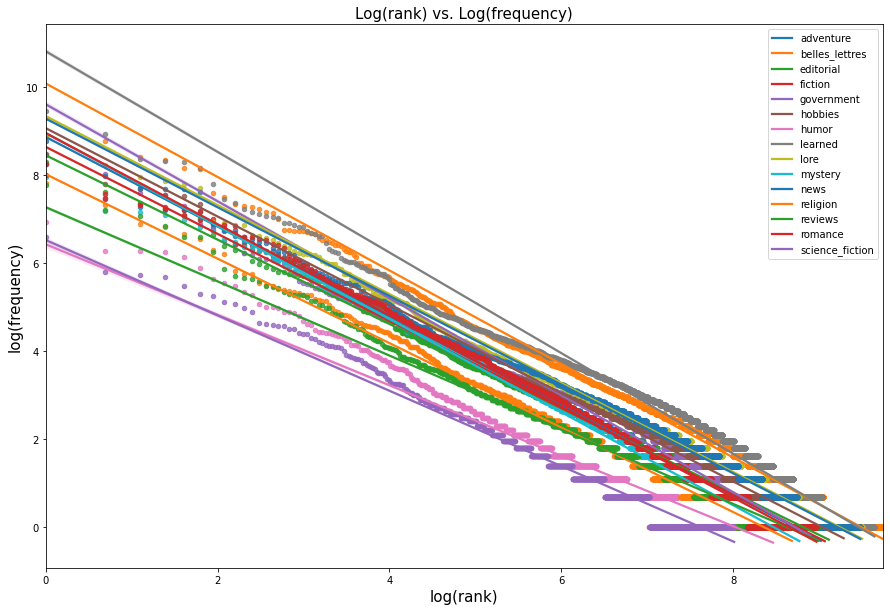

In [ ]:
fig = plt.subplots(figsize=(15,10))
genres = brown.categories()
count=0

for genre in genres: 
  freq_dist = genre_freqdict[genre]
  sns.regplot(x=np.log(range(1,len(freq_dist)+1)), y=np.log(list(freq_dist.values())), scatter_kws={'s':20})


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency)', fontsize = 15)
plt.legend(genres)
plt.show()

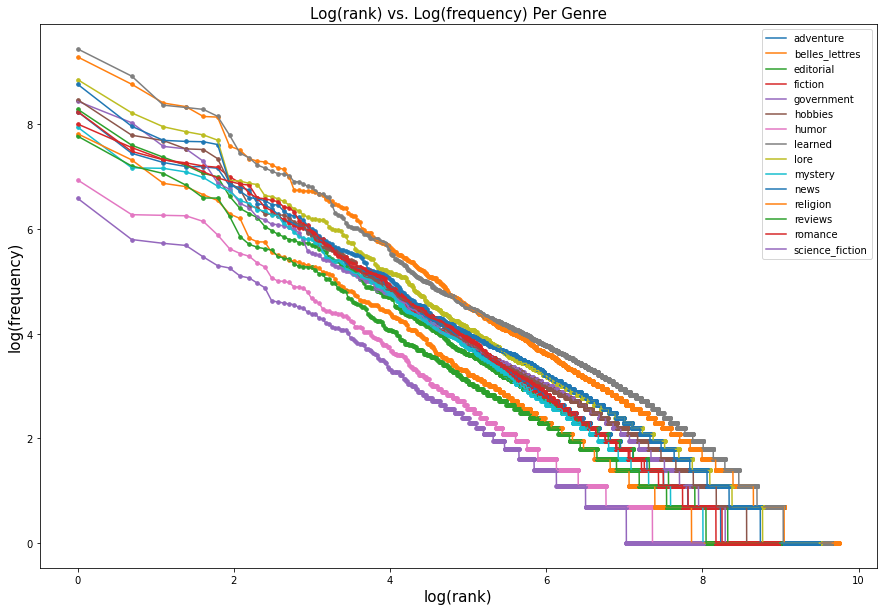

In [ ]:
fig = plt.subplots(figsize=(15,10))
genres = brown.categories()
count=0

for genre in genres: 
  freq_dist = genre_freqdict[genre]
  plt.scatter(x=np.log(range(1,len(freq_dist)+1)), y=np.log(list(freq_dist.values())), s=13)
  plt.plot(np.log(range(1,len(freq_dist)+1)), np.log(list(freq_dist.values())))


plt.xlabel('log(rank)', fontsize = 15)
plt.ylabel('log(frequency)', fontsize = 15)
plt.title('Log(rank) vs. Log(frequency) Per Genre', fontsize = 15)
plt.legend(genres)
plt.show()

#Rank v. Freq scatterplot for Brown Corpus

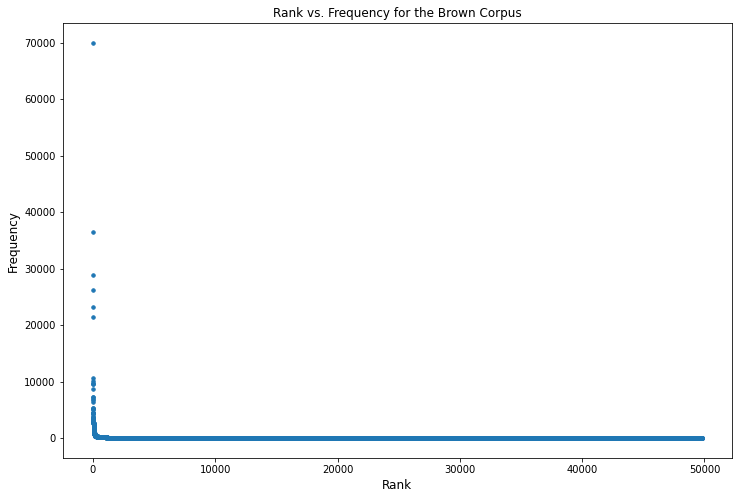

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x =range(1,len(brown_dist)+1), y=list(brown_dist.values()), s=12)

plt.title('Rank vs. Frequency for the Brown Corpus', fontsize=12)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

#Rank v. Frequency scatterplot for every genre

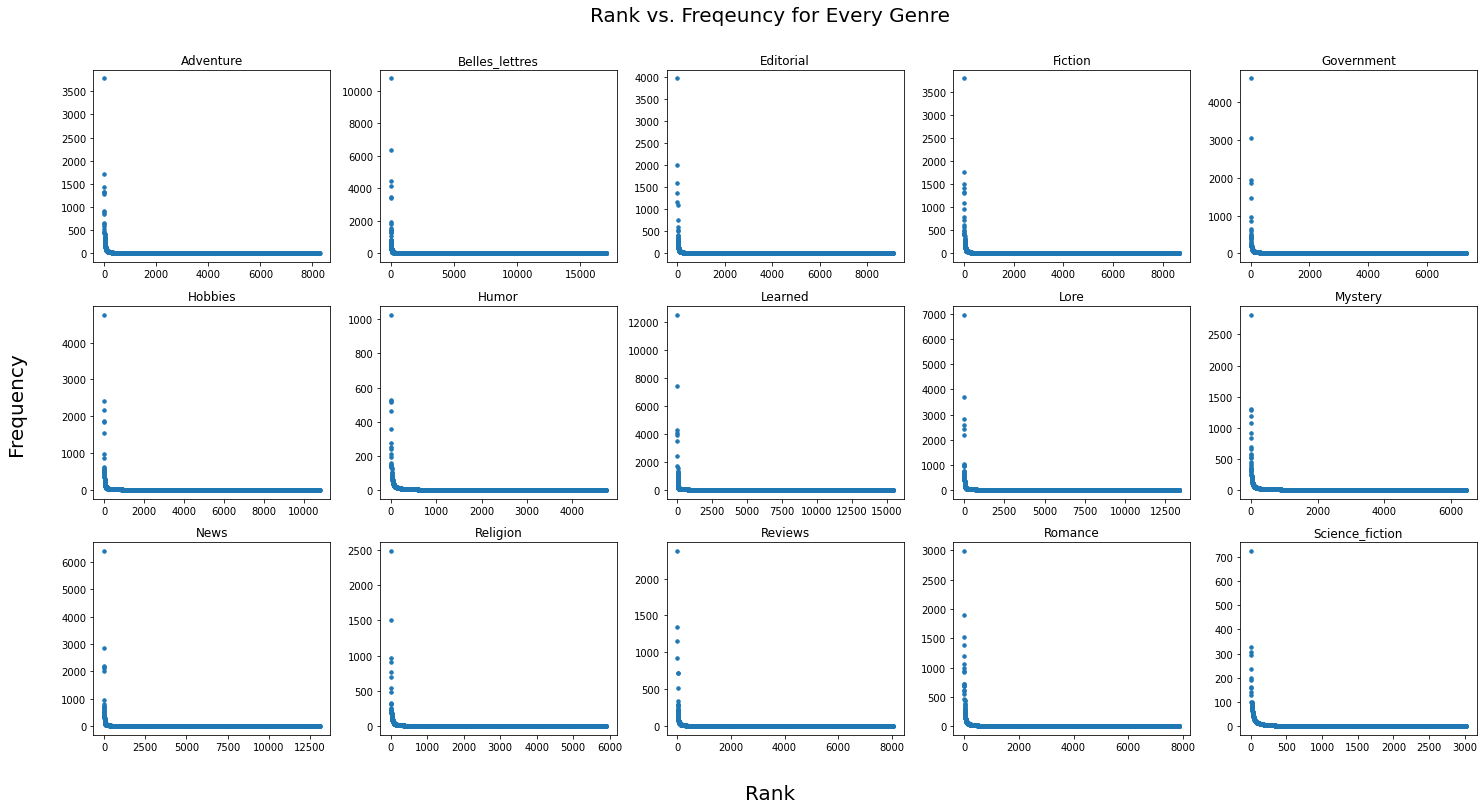

In [ ]:
# 3x5 chart with each chart being the scatterplot for a particular genre

genres = brown.categories()
count=0

fig, ax = plt.subplots(3,5, figsize = (20,10))

#Loop over the rows
for i in range(3): 
  #Loop over the columns
  for j in range(5): 

    #get the genre we want to plot
    genre = genres[count]

    #get the frequency distribution of the genre
    freq_dist = genre_freqdict[genre]

    #Create the scatterplot for that genre at location [i,j]
    ax[i,j].scatter(x =range(1,len(freq_dist)+1), y=list(freq_dist.values()), s=12)
    ax[i,j].set_title(f"{genre.capitalize()}")
    #ax[i,j].set_xlabel('Rank')
    #ax[i,j].set_ylabel('Frequency')

    #increment count to move onto next genre
    count+=1

fig.tight_layout()
fig.text(0.5, -0.05, 'Rank', ha='center', fontsize=20)
fig.text(-0.03, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre', ha='center', fontsize=20)

#fig.suptitle('Rank vs. Freqeuncy for Every Genre')


plt.show()

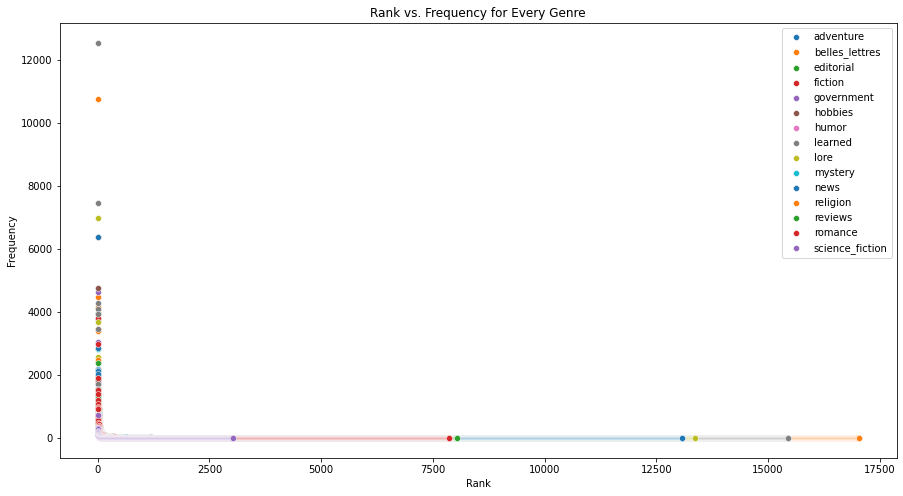

In [ ]:
plt.figure(figsize = (15,8))
for genre in genres: 
  freq_dist = genre_freqdict[genre]
  sns.scatterplot(x =range(1,len(freq_dist)+1), y=list(freq_dist.values()))

plt.legend(genres)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Rank vs. Frequency for Every Genre')
plt.show()

In [ ]:
fig.text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre', ha='center', fontsize=20)


Text(0.5, 1.03, 'Rank vs. Freqeuncy for Every Genre')

#Linear-linear scale rank v freq plot of top 30 words in the Brown Corpus

In [ ]:
#Get the first 30 key,pairs of the brown frequency distribution

top30 = list(brown_dist.items())[:30]
top30

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164),
 ('this', 5145),
 ('had', 5133),
 ('not', 4610),
 ('are', 4394),
 ('but', 4381),
 ('from', 4370),
 ('or', 4206),
 ('have', 3942),
 ('an', 3740),
 ('they', 3620)]

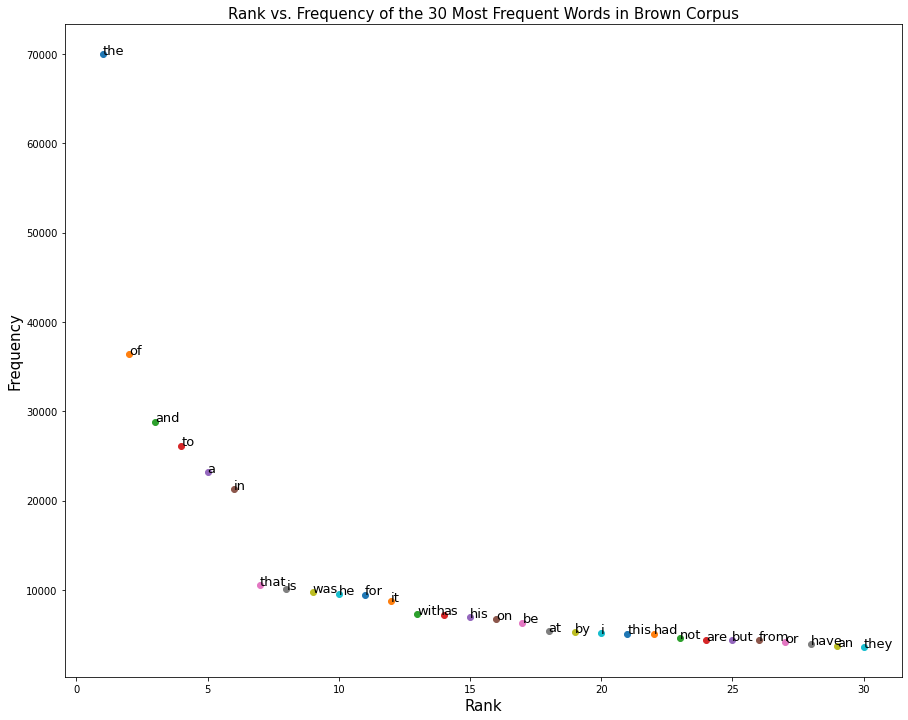

In [ ]:
plt.figure(figsize = (15,12))

x=1

for word,freq in top30: 
  plt.scatter(x, freq)
  plt.annotate(f"{word}",( x, freq), fontsize=13)
  x +=1

plt.xlabel('Rank', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Rank vs. Frequency of the 30 Most Frequent Words in Brown Corpus', fontsize=15)

plt.show()

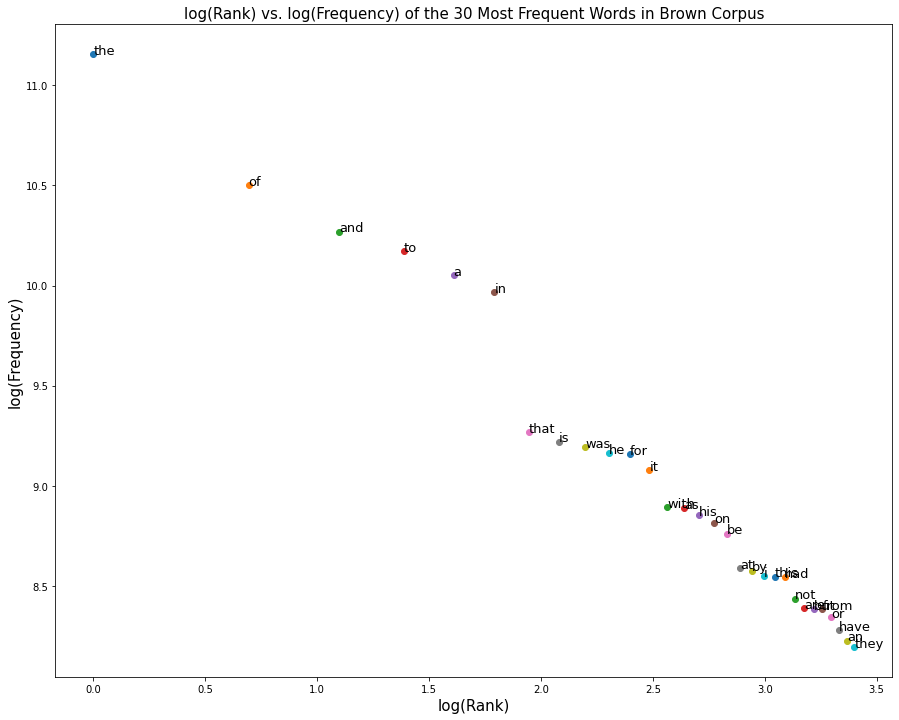

In [ ]:
plt.figure(figsize = (15,12))

x=1

for word,freq in top30: 
  plt.scatter(x = np.log(x), y=np.log(freq))
  plt.annotate(f"{word}",( np.log(x), np.log(freq)), fontsize=13)
  x +=1

plt.xlabel('log(Rank)', fontsize=15)
plt.ylabel('log(Frequency)', fontsize=15)
plt.title('log(Rank) vs. log(Frequency) of the 30 Most Frequent Words in Brown Corpus', fontsize=15)

plt.show()

Note how relatively short all the most frequent words are.

#Wordcloud for Brown Corpus

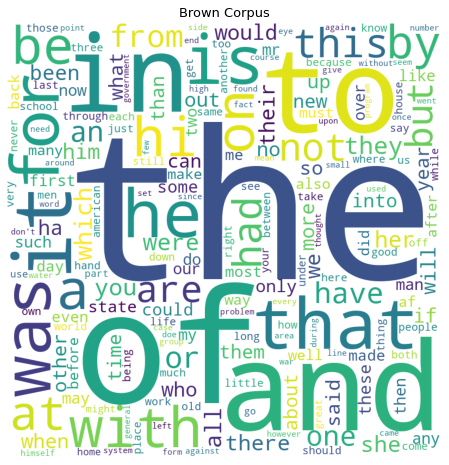

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (12,8))

#Preprocess the list of words from Brown 
brown_text = ' '.join(preprocess(brown_words))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[],collocations=False, random_state=2).generate(brown_text)

plt.imshow(wordcloud)
plt.title('Brown Corpus', fontsize = 13)
plt.axis('off')
plt.show()

#Wordcloud for every genre

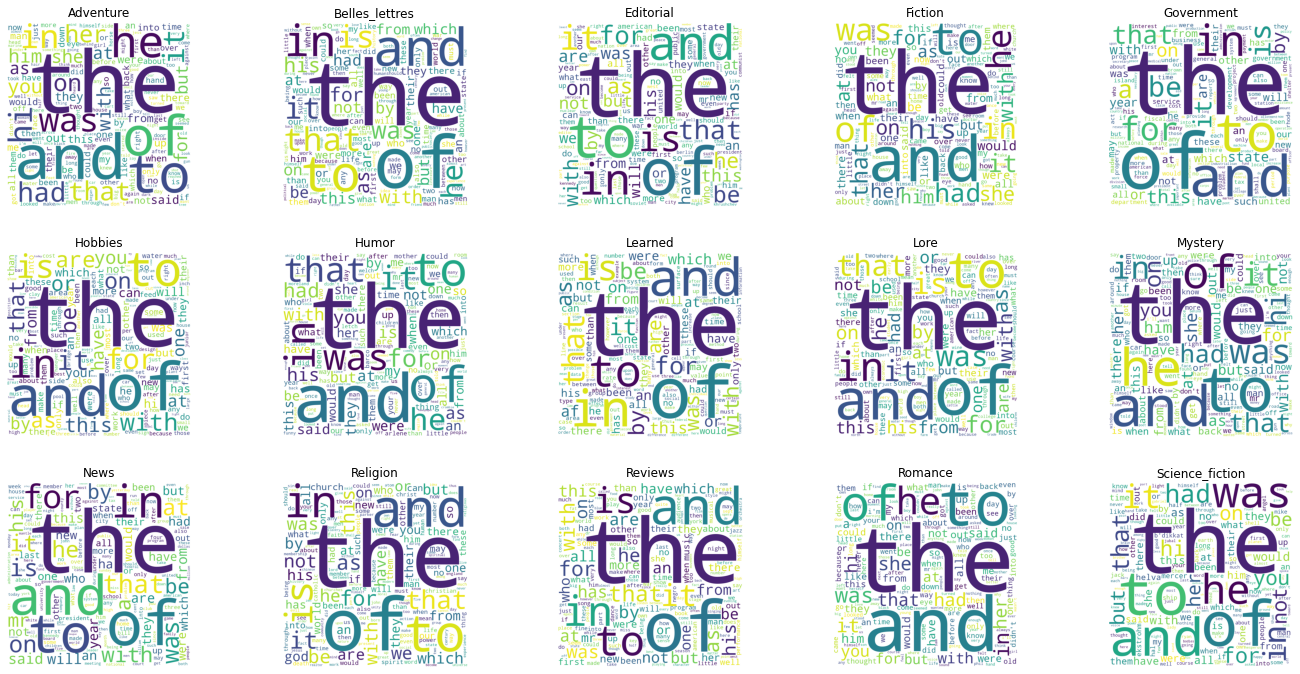

In [ ]:
from wordcloud import WordCloud 

fig, ax = plt.subplots(3,5, figsize = (20,10))

count=0


#Loop over the rows
for i in range(3): 
  #Loop over the columns
  for j in range(5): 

    #get the genre we want to plot
    genre = genres[count]

    #Get the unprocessed list of all words for the genre
    genre_text = brown.words(categories = genre)

    #Process genre_text it and join every word in a comprehensive document
    genre_text = ' '.join(preprocess(genre_text))
    
    #Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, stopwords=[],collocations=False, random_state=1).generate(genre_text) 
    
    #Plot the wordcloud
    ax[i,j].imshow(wordcloud)
    ax[i,j].set_title(f"{genre.capitalize()}")
    ax[i,j].axis('off')
    
    #Increment count to get next genre in the next pass of the loop
    count+=1

plt.axis('off')
plt.tight_layout(pad = 3) 
plt.show()


#Plot Density Function of Scifi_Dist to check for 80/20 distribution (if top 20% of tokens comprise 80% of the total corpus).

In [ ]:
vv = pd.DataFrame(scifi_dist.values(), index=range(1, len(scifi_dist)+1),columns = ['freq'])
vv

,freq
1,723
2,329
3,306
4,294
5,236
...,...
3014,1
3015,1
3016,1
3017,1


In [ ]:
np.cumsum(vv['freq'])

1         723
2        1052
3        1358
4        1652
5        1888
        ...  
3014    12036
3015    12037
3016    12038
3017    12039
3018    12040
Name: freq, Length: 3018, dtype: int64

In [ ]:
vv['proportion'] = vv/ 12040
vv.head()

,freq,proportion
1,723,0.060050
2,329,0.027326
3,306,0.025415
4,294,0.024419
5,236,0.019601


In [ ]:
pp = np.cumsum(vv['proportion'])
pp

1       0.060050
2       0.087375
3       0.112791
4       0.137209
5       0.156811
          ...   
3014    0.999668
3015    0.999751
3016    0.999834
3017    0.999917
3018    1.000000
Name: proportion, Length: 3018, dtype: float64

In [ ]:
#What is the index of pp that will give us a cumulative proportion of 50%? 

pp[pp>=.5]

87      0.501163
88      0.502492
89      0.503821
90      0.505150
91      0.506478
          ...   
3014    0.999668
3015    0.999751
3016    0.999834
3017    0.999917
3018    1.000000
Name: proportion, Length: 2932, dtype: float64

#CDF for Brown Corpus as a Whole

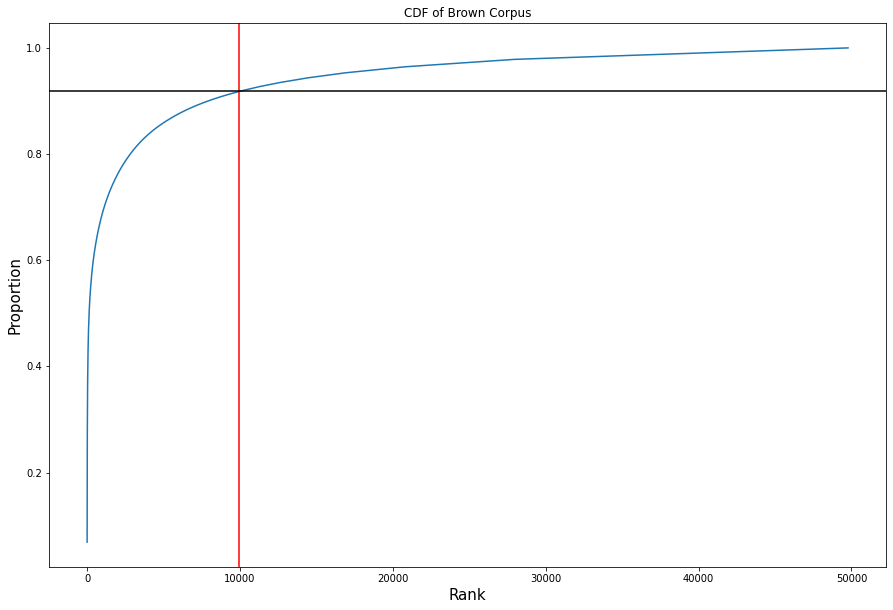

In [ ]:
plt.figure(figsize = (15,10))

#Get the total number of words in the corpus (by summing the frequency of occurance for each word in the corpus)
total_words = sum(brown_dist.values())

#Get proportion of each word in corpus by dividing each word's frequency by the total number of words
prop_arr = np.array([i/total_words for i in brown_dist.values()])

#Get the cumulative sum pf prop_l to get the cumulative proportion up to that word
cum_prop = np.cumsum(prop_arr)
  
#Plot the CDF
sns.lineplot(x = range(1,len(brown_dist)+1), y = cum_prop)


#Draw the intersection of the red and black lines
#First, find the index of the word that makes 20% mark
idx_20 = round(.2*len(brown_dist))

#Find the cumulative frequency up to the word that represents the 20% mark by multiplying the length of the dictionary (ie the total # of unique tokens) by 0.2
cumprop_20 = cum_prop[idx_20]

#Plot the red and black lines
plt.axvline(x = idx_20, color = 'red')
plt.axhline(y = cumprop_20, color='black')

plt.title('CDF of Brown Corpus')
plt.xlabel('Rank', fontsize = 15)
plt.ylabel('Proportion', fontsize=15)

plt.show()

#Cumulative Density Function of Every Genre 



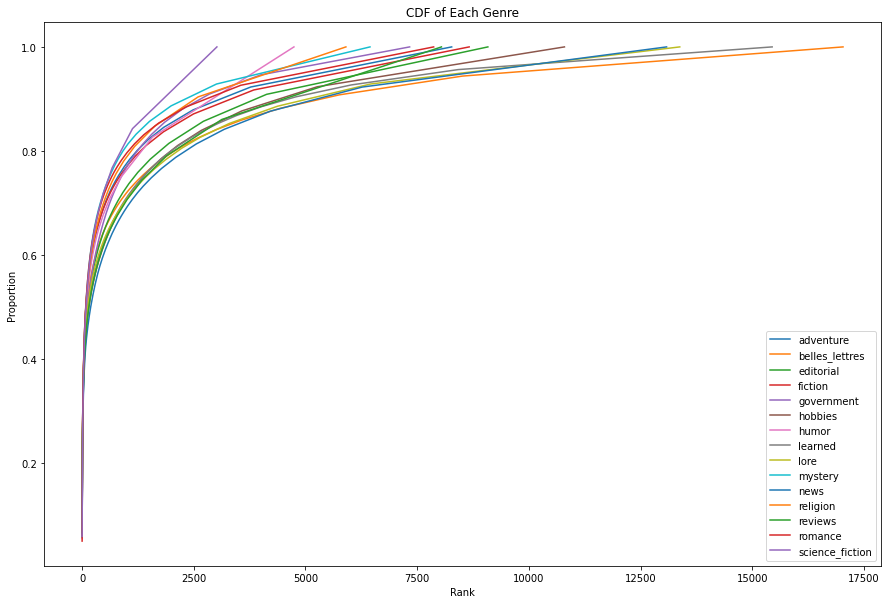

In [ ]:
plt.figure(figsize = (15,10))

for genre in genres: 
  freq_dist = genre_freqdict[genre]

  #Get the total number of words in the corpus (by summing the frequency of occurance for each word in the corpus)
  total_words = sum(freq_dist.values())

  #Get proportion of each word in corpus by dividing each word's frequency by the total number of words
  prop_arr = np.array([i/total_words for i in freq_dist.values()])

  #Get the cumulative sum pf prop_l to get the cumulative proportion up to that word
  cum_prop = np.cumsum(prop_arr)
  
  #Plot the CDF
  sns.lineplot(x = range(1,len(freq_dist)+1), y = cum_prop)

plt.title('CDF of Each Genre')
plt.xlabel('Rank')
plt.ylabel('Proportion')

plt.legend(genres)
plt.show()

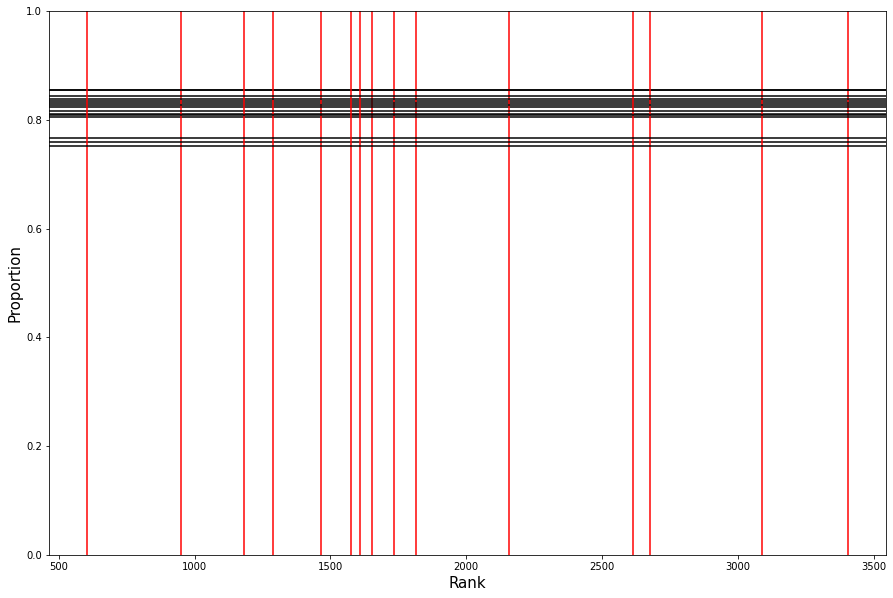

In [ ]:
plt.figure(figsize = (15,10))

for genre in genres: 
  freq_dist = genre_freqdict[genre]

  #Get the total number of words in the corpus
  total_words = sum(freq_dist.values())

  #Get proportion of each word in corpus by dividing the frequency of that word by the total number of words
  prop_arr = np.array([i/total_words for i in freq_dist.values()])

  #Get the cumulative sum of prop_arr to calculate a list of the cumulative proportion up to that word
  cum_prop = np.cumsum(prop_arr)
  
  #Draw the intersection of the red and black lines
  #First, find the index of the word that makes 20% mark by multiplying the length of the dictionary (ie the total # of unique tokens) by 0.2
  idx_20 = round(.2*len(freq_dist))

  #Find the cumulative frequency up to the word that represents the 20% mark
  cumprop_20 = cum_prop[idx_20]

  #Plot the red and black lines
  plt.axvline(x = idx_20, color ='red')
  plt.axhline(y = cumprop_20, color='black') 


plt.xlabel('Rank', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.show()

#What proportion of the total number of words each genre corpus does "the" comprise?

In [ ]:
def the_proportion(dist): 
  '''
  Input: Frequency distribution of a particular corpus. 
  Output: The proportion of the corpus that "the" comprises 
  '''

  #Get the total number of words in the corpus
  total_words = sum(dist.values())

  #get the proportion by dividing the frequency of "the" for that corpus by the total number of words in the corpus
  proportion = round(dist['the'] / total_words, 4)

  return proportion


In [ ]:
for genre in genres: 
  genre_dist = genre_freqdict[genre]
  proportion = the_proportion(genre_dist)
  print(f"'The' comprises {proportion*100: .2f}% of the {genre} genre.")
  

'The' comprises  6.47% of the adventure genre.
'The' comprises  7.08% of the belles_lettres genre.
'The' comprises  7.28% of the editorial genre.
'The' comprises  6.50% of the fiction genre.
'The' comprises  7.44% of the government genre.
'The' comprises  6.58% of the hobbies genre.
'The' comprises  5.62% of the humor genre.
'The' comprises  7.77% of the learned genre.
'The' comprises  7.18% of the lore genre.
'The' comprises  5.84% of the mystery genre.
'The' comprises  7.23% of the news genre.
'The' comprises  7.20% of the religion genre.
'The' comprises  6.72% of the reviews genre.
'The' comprises  5.10% of the romance genre.
'The' comprises  6.00% of the science_fiction genre.


#What proportion of the total number of words in the Brown corpus does "the" comprise?

In [ ]:
brown_theProportion = the_proportion(brown_dist)

print(f"'The' comprises {brown_theProportion*100: .2f}% of the Brown Corpus.")



'The' comprises  6.92% of the Brown Corpus.


In [ ]:
the_propList = []

for genre in genres: 
  genre_dist = genre_freqdict[genre]
  proportion = the_proportion(genre_dist)
  the_propList.append(proportion)

the_propList

[0.0647,
 0.0708,
 0.0728,
 0.065,
 0.0744,
 0.0658,
 0.0562,
 0.0777,
 0.0718,
 0.0584,
 0.0723,
 0.072,
 0.0672,
 0.051,
 0.06]

In [ ]:
#Add into the_propList at index 0  the proportion for Brown Corpus 
the_propList.insert(0, .0692) 

In [ ]:
#New genre list called corpus_labels which includes 'Brown Corpus' at index 0. This is to provide the adequate xtick labels for the below barchart 

corpus_labels = genres.copy()
corpus_labels.insert(0, 'Brown Corpus')


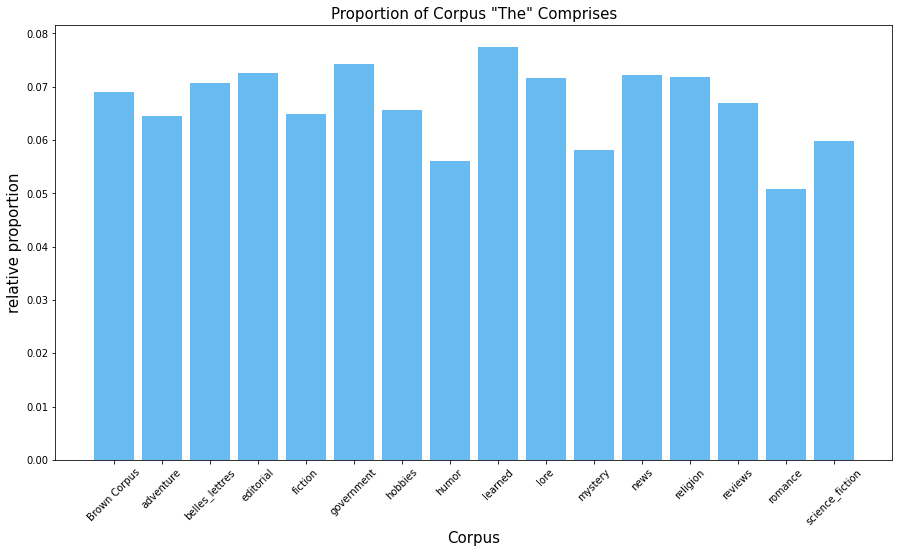

In [ ]:
plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], the_propList[i], color ='#68BBF1',edgecolor='white', width=.85)


plt.title('Proportion of Corpus "The" Comprises', fontsize=15)
plt.xlabel('Corpus', fontsize = 15)
plt.ylabel('relative proportion', fontsize=15)
plt.xticks(r, corpus_labels, rotation = 45)
plt.show()

#How many words in the entire Brown Corpus are Hapax Legomenon?

**Pattern**: Almost all of the most frequently used words are short. You find that word length increased the less frequently it is used(much of the hapax legomena are relatively long words). There is an inverse relationship between frequency and word length. Or, there is a direct relationship between the rank of the word and the word length.

In [ ]:
def hapax(dist): 
  '''
  Input: A frequency distribution of a particular corpus
  Output: The number of hapax legomena, and the proportion of hapax legomenon to the total number of tokens
  '''

  #Get the number of tokens in the corpus that are hapax legomena (ie frequency of the token equals 1)
  num_hapax = len([word for word,freq in dist.items() if freq == 1])

  #Find out what proportion of tokens in the corpus are hapax legomena
  prop_hapax = num_hapax / len(dist)

  return num_hapax, prop_hapax

In [ ]:
num_hapax, prop_hapax = hapax(brown_dist)

print(f"There are {num_hapax} hapax legomena in the Brown Corpus and they form {prop_hapax*100 : .2f}% of all the tokens in the corpus.")

There are 22007 hapax legomena in the Brown Corpus and they form  44.21% of all the tokens in the corpus.


#How many words in each genre are hapax legomena?

In [ ]:
for genre in genres: 
  genre_dist = genre_freqdict[genre]
  num_hapax, prop_hapax = hapax(genre_dist)
  
  print(f"There are {num_hapax} hapax legomena in the {genre} genre and they form {prop_hapax*100 : .2f}% of all the tokens in the genre.")

There are 4509 hapax legomena in the adventure genre and they form  54.51% of all the tokens in the genre.
There are 8551 hapax legomena in the belles_lettres genre and they form  50.21% of all the tokens in the genre.
There are 4964 hapax legomena in the editorial genre and they form  54.66% of all the tokens in the genre.
There are 4835 hapax legomena in the fiction genre and they form  55.81% of all the tokens in the genre.
There are 3344 hapax legomena in the government genre and they form  45.61% of all the tokens in the genre.
There are 5550 hapax legomena in the hobbies genre and they form  51.41% of all the tokens in the genre.
There are 3172 hapax legomena in the humor genre and they form  66.89% of all the tokens in the genre.
There are 7062 hapax legomena in the learned genre and they form  45.72% of all the tokens in the genre.
There are 6942 hapax legomena in the lore genre and they form  51.90% of all the tokens in the genre.
There are 3446 hapax legomena in the mystery g

#Stacked Barchart for relative proportion of hapax legomena

In [ ]:
#Get a list of the proportion of all tokens in each corpus that are hapax legomena
hapax_proportion = []

for genre in genres: 
  genre_dist = genre_freqdict[genre]
  num_hapax, prop_hapax = hapax(genre_dist)
  hapax_proportion.append(prop_hapax)

In [ ]:
#Insert the proportion of hapax legomena for the entire Brown Corpus into the hapax_proportion list at index 0
hapax_proportion.insert(0, .4421)

In [ ]:
hapax_proportion

[0.4421,
 0.5450918762088974,
 0.5020844342669251,
 0.5465756441312486,
 0.558056325023084,
 0.4561451370890738,
 0.5140792886254169,
 0.6689160691691269,
 0.45723535124635806,
 0.5189504373177842,
 0.5347610180012414,
 0.5221678642409417,
 0.5613886536833192,
 0.6123818995524615,
 0.5500063540475283,
 0.6275679257786614]

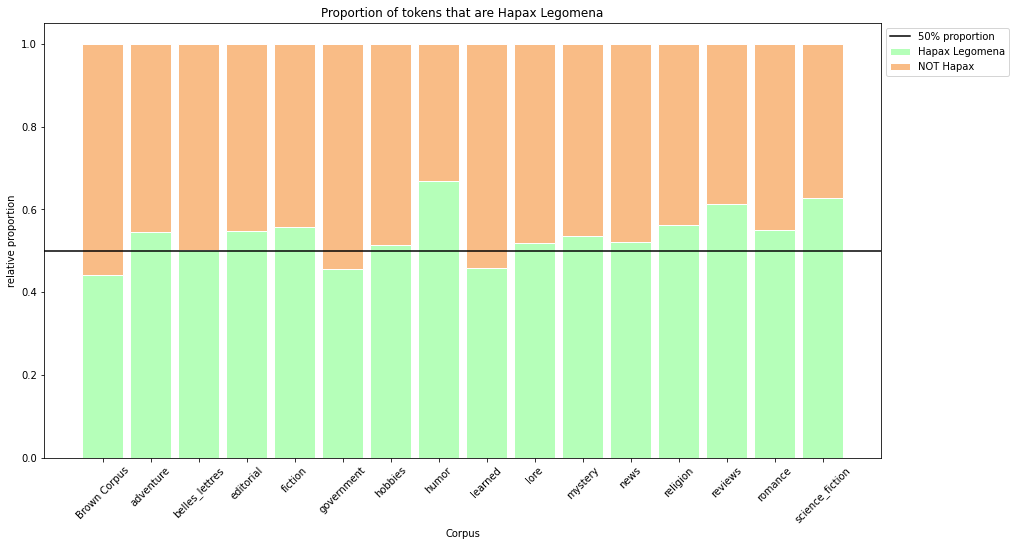

In [ ]:
#Stacked barchart for hapax legomena in Brown Corpus and all the genres

plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], hapax_proportion[i], color ='#b5ffb9',edgecolor='white', width=.85, label = 'Hapax Legomena' )
  plt.bar(r[i], 1-hapax_proportion[i], color ='#f9bc86', bottom = hapax_proportion[i], edgecolor='white', width=.85, label = 'NOT Hapax Legomena' )


#Draw dotted horizontal black line marking 50% proportion 
plt.axhline(y = .50, color='black')

plt.title('Proportion of tokens that are Hapax Legomena')
plt.xlabel('Corpus')
plt.ylabel('relative proportion')
plt.xticks(r, corpus_labels, rotation = 45)
plt.legend(['50% proportion', 'Hapax Legomena', 'NOT Hapax'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

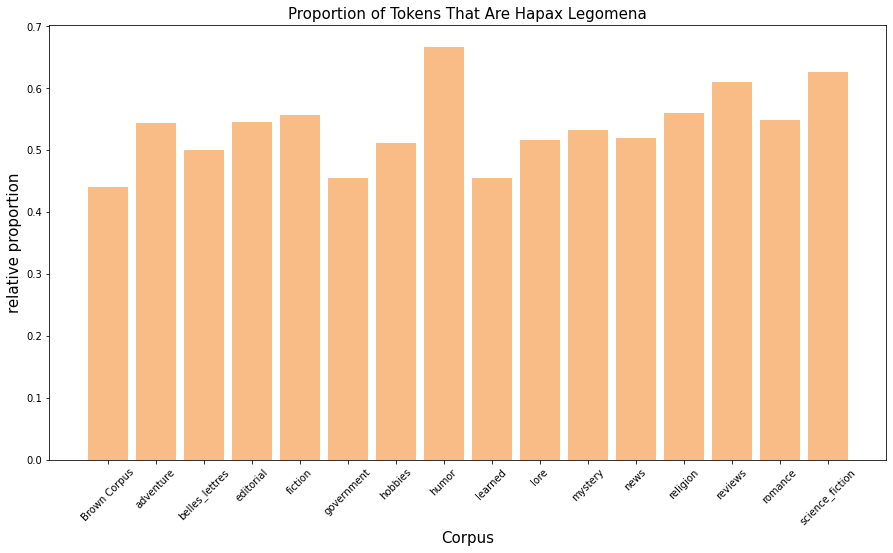

In [ ]:
plt.figure(figsize = (15,8))

#The number of bars we'd like to plot. This is equal to the length of corpus_labels
r = range(len(corpus_labels))

for i in r: 
  plt.bar(r[i], hapax_proportion[i], color ='#f9bc86',edgecolor='white', width=.85, label = 'Hapax Legomena' )


plt.title('Proportion of Tokens That Are Hapax Legomena', fontsize=15)
plt.xlabel('Corpus', fontsize = 15)
plt.ylabel('relative proportion', fontsize=15)
plt.xticks(r, corpus_labels, rotation = 45)
plt.show()

#Below are the first 50 the hapax legomena in the Brown Corpus. Note that they all mostly on the relatively longer side

In [ ]:
[word for word,freq in brown_dist.items() if freq == 1][:50]

['fickle',
 'renfro',
 'angling',
 'frowzy',
 'greedily',
 'half-acre',
 "buckhorn's",
 'woebegone',
 'dejectedly',
 'rafter',
 'best-looking',
 'innocents',
 'scissors',
 'savvy',
 'rittenhouse',
 'splendide',
 'croaks',
 "'pache",
 'anythin',
 'driftin',
 'cinches',
 'looped',
 'somethin',
 'huskily',
 'untenanted',
 'palely',
 'gullies',
 'windless',
 "pettigrew's",
 "lester's",
 "cabot's",
 'silas',
 'pettigrew',
 'pennants',
 'enfield',
 'cap-and-ball',
 'tunic',
 'gagged',
 'blustered',
 'unutterably',
 'sop',
 'slouch',
 'parried',
 'backlash',
 'tethers',
 "fat's",
 "sentry's",
 'feds',
 'panted',
 'whack']